In [1]:
from sklearn import preprocessing
import http.client, urllib.parse
import pandas as pd
import numpy as np
import math
import json
from geopy.distance import geodesic
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def getDist(houses, locations):
    distances = []
        
    for ind in houses.index:
        y1 = houses['Longitude'][ind]
        x1 = houses['Latitude'][ind]
        coord1 = (y1,x1)
        min_dist = 9999999
        for i in locations.index:
            y2 = locations['Latitude'][i]
            x2 = locations['Longitude'][i]
            coord2 = (y2,x2)
            try:
                dist = geodesic(coord1, coord2).miles
                if dist < min_dist:
                    min_dist = dist
            except:
                pass
        distances.append(min_dist)  

        
    return distances

def getCoords(df):
    
    #api info
    conn = http.client.HTTPConnection('api.positionstack.com')
    key = 'df3b33e27a0f6451fd9aae993c6a26fa'
    
    
    def query(coord, address):

        params = urllib.parse.urlencode({
            'access_key': key,
            'query': address,
            'limit': 1
            })
        
        conn.request('GET', '/v1/forward?{}'.format(params))
        results = conn.getresponse()
        data = json.loads(results.read())['data'][0] #converts json to dict
        
        if coord == 'x':
            result = data['latitude']
        else:
            result = data['longitude']
            
            return result
    

    lat = [query('x', address) for address in df.iloc[:,0]]
    lon = [query('y', address) for address in df.iloc[:,0]]
    
    df['latitude'] = lat
    df['longitude'] = lon
    
    return df

In [4]:
#IMPORT AND ORGANIZE DATA

houses = pd.read_csv('../data/final/houses_clean.csv')

houses_la = houses[houses['City'] == 'Los Angeles']
houses_anaheim = houses[houses['City'] == 'Anaheim']
houses_longbeach = houses[houses['City'] == 'Long Beach']

houses_dallas = houses[houses['City'] == 'Dallas']
houses_fortworth = houses[houses['City'] == 'Fort Worth']
houses_arlington_tx = houses[houses['City'] == 'ArlingtonTX']

houses_chicago = houses[houses['City'] == 'Chicago']
houses_naperville = houses[houses['City'] == 'Naperville']
houses_elgin = houses[houses['City'] == 'Elgin']

houses_washington = houses[houses['City'] == 'Washington']
houses_alexandria = houses[houses['City'] == 'Alexandria']
houses_arlington_va = houses[houses['City'] == 'ArlingtonVA']


schools = pd.read_csv('../data/final/schools.csv')
schools_la = schools[schools['City'] == 'Los Angeles']
schools_anaheim = schools[schools['City'] == 'Anaheim']
schools_longbeach = schools[schools['City'] == 'Long Beach']

schools_dallas = schools[schools['City'] == 'Dallas']
schools_fortworth = schools[schools['City'] == 'Fort Worth']
schools_atx = schools[schools['City'] == 'ArlingtonTX']

schools_chicago = schools[schools['City'] == 'Chicago']
schools_naperville = schools[schools['City'] == 'Naperville']
schools_elgin = schools[schools['City'] == 'Elgin']

schools_washington = schools[schools['City'] == 'Washington']
schools_alex = schools[schools['City'] == 'Alexandria']
schools_ava = schools[schools['City'] == 'ArlingtonVA']


hospitals = pd.read_csv('../data/final/hospital.csv')

hospitals_la = hospitals[hospitals['City'] == 'Los Angeles']
hospitals_a = hospitals[hospitals['City'] == 'Anaheim']
hospitals_lb = hospitals[hospitals['City'] == 'Long Beach']

hospitals_d = hospitals[hospitals['City'] == 'Dallas']
hospitals_fw = hospitals[hospitals['City'] == 'Fort Worth']
hospitals_atx = hospitals[hospitals['City'] == 'ArlingtonTX']

hospitals_c = hospitals[hospitals['City'] == 'Chicago']
hospitals_n = hospitals[hospitals['City'] == 'Naperville']
hospitals_e = hospitals[hospitals['City'] == 'Elgin']

hospitals_dc = schools[schools['City'] == 'Washington']
hospitals_alex = schools[schools['City'] == 'Alexandria']
hospitals_ava = schools[schools['City'] == 'ArlingtonVA']

grocery = pd.read_csv('../data/final/grocery.csv')

grocery_la = grocery[grocery['City'] == 'Los Angeles']
grocery_a = grocery[grocery['City'] == 'Anaheim']
grocery_lb = grocery[grocery['City'] == 'Long Beach']

grocery_d = grocery[grocery['City'] == 'Dallas']
grocery_fw = grocery[grocery['City'] == 'Fort Worth']
grocery_atx = grocery[grocery['City'] == 'ArlingtonTX']

grocery_c = grocery[grocery['City'] == 'Chicago']
grocery_n = grocery[grocery['City'] == 'Naperville']
grocery_e = grocery[grocery['City'] == 'Elgin']

grocery_dc = grocery[grocery['City'] == 'Washington']
grocery_alex = grocery[grocery['City'] == 'Alexandria']
grocery_ava = grocery[grocery['City'] == 'ArlingtonVA']

gym = pd.read_csv('../data/final/gym.csv')

gym_la = gym[gym['City'] == 'Los Angeles']
gym_lb = gym[gym['City'] == 'Long Beach']
gym_a = gym[gym['City'] == 'Anaheim']

gym_d = gym[gym['City'] == 'Dallas']
gym_atx = gym[gym['City'] == 'ArlingtonTX']
gym_fw = gym[gym['City'] == 'Fort Worth']

gym_c = gym[gym['City'] == 'Chicago']
gym_e = gym[gym['City'] == 'Elgin']
gym_n = gym[gym['City'] == 'Naperville']

gym_dc = gym[gym['City'] == 'Washington']
gym_ava = gym[gym['City'] == 'ArlingtonVA']
gym_alex = gym[gym['City'] == 'Alexandria']

parks = pd.read_csv('../data/final/parks.csv')

parks_la = parks[parks['City'] == 'Los Angeles']
parks_lb = parks[parks['City'] == 'Long Beach']
parks_a = parks[parks['City'] == 'Anaheim']

parks_d = parks[parks['City'] == 'Dallas']
parks_atx = parks[parks['City'] == 'ArlingtonTX']
parks_fw = parks[parks['City'] == 'Fort Worth']

parks_c = parks[parks['City'] == 'Chicago']
parks_e = parks[parks['City'] == 'Elgin']
parks_n = parks[parks['City'] == 'Naperville']

parks_dc = parks[parks['City'] == 'Washington']
parks_ava = parks[parks['City'] == 'ArlingtonVA']
parks_alex = parks[parks['City'] == 'Alexandria']

beaches = pd.read_csv('../data/final/beach.csv')

beaches_la = beaches[beaches['City'] == 'Los Angeles']
beaches_lb = beaches[beaches['City'] == 'Long Beach']
beaches_a = beaches[beaches['City'] == 'Anaheim']

beaches_d = beaches[beaches['City'] == 'Dallas']
beaches_atx = beaches[beaches['City'] == 'ArlingtonTX']
beaches_fw = beaches[beaches['City'] == 'Fort Worth']

beaches_c = beaches[beaches['City'] == 'Chicago']
beaches_e = beaches[beaches['City'] == 'Elgin']
beaches_n = beaches[beaches['City'] == 'Naperville']

beaches_dc = beaches[beaches['City'] == 'Washington']
beaches_ava = beaches[beaches['City'] == 'ArlingtonVA']
beaches_alex = beaches[beaches['City'] == 'Alexandria']

cemetary = pd.read_csv('../data/final/cemetary.csv')

cemetary_la = cemetary[cemetary['City'] == 'Los Angeles']
cemetary_lb = cemetary[cemetary['City'] == 'Long Beach']
cemetary_a = cemetary[cemetary['City'] == 'Anaheim']

cemetary_d = cemetary[cemetary['City'] == 'Dallas']
cemetary_atx = cemetary[cemetary['City'] == 'ArlingtonTX']
cemetary_fw = cemetary[cemetary['City'] == 'Fort Worth']

cemetary_c = cemetary[cemetary['City'] == 'Chicago']
cemetary_e = cemetary[cemetary['City'] == 'Elgin']
cemetary_n = cemetary[cemetary['City'] == 'Naperville']

cemetary_dc = cemetary[cemetary['City'] == 'Washington']
cemetary_ava = cemetary[cemetary['City'] == 'ArlingtonVA']
cemetary_alex = cemetary[cemetary['City'] == 'Alexandria']

shopping = pd.read_csv('../data/final/shopping.csv')

shopping_la = shopping[shopping['City'] == 'Los Angeles']
shopping_lb = shopping[shopping['City'] == 'Long Beach']
shopping_a = shopping[shopping['City'] == 'Anaheim']

shopping_d = shopping[shopping['City'] == 'Dallas']
shopping_atx = shopping[shopping['City'] == 'ArlingtonTX']
shopping_fw = shopping[shopping['City'] == 'Fort Worth']

shopping_c = shopping[shopping['City'] == 'Chicago']
shopping_e = shopping[shopping['City'] == 'Elgin']
shopping_n = shopping[shopping['City'] == 'Naperville']

shopping_dc = shopping[shopping['City'] == 'Washington']
shopping_ava = shopping[shopping['City'] == 'ArlingtonVA']
shopping_alex = shopping[shopping['City'] == 'Alexandria']

resturant = pd.read_csv('../data/final/restaurants.csv')

resturant_la = resturant[resturant['City'] == 'Los Angeles']
resturant_lb = resturant[resturant['City'] == 'Long Beach']
resturant_a = resturant[resturant['City'] == 'Anaheim']

resturant_d = resturant[resturant['City'] == 'Dallas']
resturant_atx = resturant[resturant['City'] == 'ArlingtonTX']
resturant_fw = resturant[resturant['City'] == 'Fort Worth']

resturant_c = resturant[resturant['City'] == 'Chicago']
resturant_e = resturant[resturant['City'] == 'Elgin']
resturant_n = resturant[resturant['City'] == 'Naperville']

resturant_dc = resturant[resturant['City'] == 'Washington']
resturant_ava = resturant[resturant['City'] == 'ArlingtonVA']
resturant_alex = resturant[resturant['City'] == 'Alexandria']

golf = pd.read_csv('../data/final/golf.csv')

golf_la = golf[golf['City'] == 'Los Angeles']
golf_lb = golf[golf['City'] == 'Long Beach']
golf_a = golf[golf['City'] == 'Anaheim']

golf_d = golf[golf['City'] == 'Dallas']
golf_atx = golf[golf['City'] == 'ArlingtonTX']
golf_fw = golf[golf['City'] == 'Fort Worth']

golf_c = golf[golf['City'] == 'Chicago']
golf_e = golf[golf['City'] == 'Elgin']
golf_n = golf[golf['City'] == 'Naperville']

golf_dc = golf[golf['City'] == 'Washington']
golf_ava = golf[golf['City'] == 'ArlingtonVA']
golf_alex = golf[golf['City'] == 'Alexandria']


In [5]:
#EDA

houses = pd.read_csv('../data/houses_clean.csv')

houses_la = houses.loc[houses['City'] == 'Anaheim']
houses_anaheim = houses.loc[houses['City'] == 'Los Angeles']
houses_longbeach = houses.loc[houses['City'] == 'Long Beach']

houses_dallas = houses.loc[houses['City'] == 'Dallas']
houses_fortworth = houses.loc[houses['City'] == 'Fort Worth']
houses_arlington_tx = houses.loc[houses['City'] == 'ArlingtonTX']

houses_chicago = houses.loc[houses['City'] == 'Chicago']
houses_naperville = houses.loc[houses['City'] == 'Naperville']
houses_elgin = houses.loc[houses['City'] == 'Elgin']

houses_washington = houses.loc[houses['City'] == 'Washington']
houses_alexandria = houses.loc[houses['City'] == 'Alexandria']
houses_arlington_va = houses.loc[houses['City'] == 'ArlingtonVA']

#combine cities by state
houses_ca = pd.concat([houses_la, houses_anaheim, houses_longbeach])
houses_tx = pd.concat([houses_dallas, houses_fortworth, houses_arlington_tx])
houses_dc = pd.concat([houses_washington, houses_alexandria, houses_arlington_va])
houses_il = pd.concat([houses_chicago, houses_naperville, houses_elgin])

#divide price by sq ft
houses_ca['Housing Price/SQ Ft'] = houses_ca['Housing Price']/houses_ca['SQ Ft']
houses_tx['Housing Price/SQ Ft'] = houses_tx['Housing Price']/houses_tx['SQ Ft']
houses_dc['Housing Price/SQ Ft'] = houses_dc['Housing Price']/houses_dc['SQ Ft']
houses_il['Housing Price/SQ Ft'] = houses_il['Housing Price']/houses_il['SQ Ft']

#houses_ca['log'] = np.log(houses_ca['Housing Price/SQ Ft'])
#houses_ca['log2'] = np.log2(houses_ca['Housing Price/SQ Ft'])
#houses_ca['log10'] = np.log10(houses_ca['Housing Price/SQ Ft'])

In [113]:
houses_tx.sort_values(by = 'Housing Price/SQ Ft', ascending=True).head()

,Unnamed: 0,Address,Housing Price,City,Longitude,Latitude,SQ Ft,Housing Price/SQ Ft,log2
1022,1059,"3595 Santa Fe Ave, Spc 15, Long Beach, CA 90810",100000,Long Beach,33.820369,-118.218059,1440.0,69.444444,6.117787
763,799,"525 N Gilbert St, Spc 151, Anaheim, CA 92801",79000,Anaheim,33.837993,-117.968340,1120.0,70.535714,6.140282
742,778,"48 Orange Via, Anaheim, CA 92801",79900,Anaheim,33.862785,-117.912253,1120.0,71.339286,6.156625
895,932,"28 Walnut Via, Anaheim, CA 92801",85000,Anaheim,33.861429,-117.914126,1152.0,73.784722,6.205250
722,758,"5 Walnut Via, Anaheim, CA 92801",69000,Anaheim,33.860027,-117.914301,888.0,77.702703,6.279893


In [130]:
houses_il.sort_values(by = 'Housing Price/SQ Ft', ascending=False).head()

,Unnamed: 0,Address,Housing Price,City,Longitude,Latitude,SQ Ft,Housing Price/SQ Ft
1684,1815,"340 E Randolph St, Unit 5606, Chicago, IL 60601",2290000,Chicago,41.884892,-87.618693,2354.0,972.812234
1637,1746,"363 E Wacker Dr, Unit 2901, Chicago, IL 60601",4400000,Chicago,41.887448,-87.618501,4527.0,971.946101
1540,1615,"30 W Oak St, Apt 9A, Chicago, IL 60610",3000000,Chicago,41.900981,-87.629479,3350.0,895.522388
1514,1584,"403 N Wabash Ave, Apt 8A, Chicago, IL 60611",2099000,Chicago,41.888914,-87.626440,2424.0,865.924092
1732,1876,"132 E Delaware Pl, Apt 6005, Chicago, IL 60611",3100000,Chicago,41.899771,-87.624724,3584.0,864.955357


In [105]:
houses_ca.shape

(1458, 8)

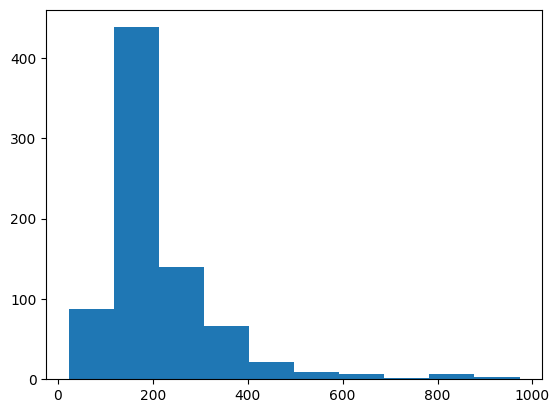

In [131]:
plt.hist(houses_il['Housing Price/SQ Ft'])
plt.show()

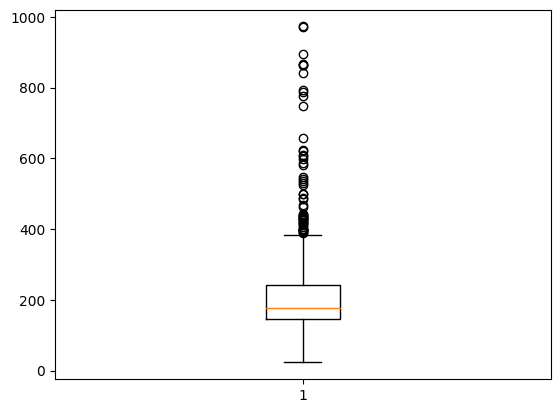

In [132]:
plt.boxplot(houses_il['Housing Price/SQ Ft'])
plt.show()

In [ ]:
#normalize
houses_ca['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_ca['Housing Price/SQ Ft']).reshape(-1,1))
houses_tx['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_tx['Housing Price/SQ Ft']).reshape(-1,1))
houses_dc['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_dc['Housing Price/SQ Ft']).reshape(-1,1))
houses_il['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_il['Housing Price/SQ Ft']).reshape(-1,1))

In [6]:
#Initialize houses for pricing
houses = pd.read_csv('../data/houses_clean.csv')

houses_la = houses.loc[houses['City'] == 'Anaheim']
houses_anaheim = houses.loc[houses['City'] == 'Los Angeles']
houses_longbeach = houses.loc[houses['City'] == 'Long Beach']

houses_dallas = houses.loc[houses['City'] == 'Dallas']
houses_fortworth = houses.loc[houses['City'] == 'Fort Worth']
houses_arlington_tx = houses.loc[houses['City'] == 'ArlingtonTX']

houses_chicago = houses.loc[houses['City'] == 'Chicago']
houses_naperville = houses.loc[houses['City'] == 'Naperville']
houses_elgin = houses.loc[houses['City'] == 'Elgin']

houses_washington = houses.loc[houses['City'] == 'Washington']
houses_alexandria = houses.loc[houses['City'] == 'Alexandria']
houses_arlington_va = houses.loc[houses['City'] == 'ArlingtonVA']

#combine cities by state
houses_ca = pd.concat([houses_la, houses_anaheim, houses_longbeach])
houses_tx = pd.concat([houses_dallas, houses_fortworth, houses_arlington_tx])
houses_dc = pd.concat([houses_washington, houses_alexandria, houses_arlington_va])
houses_il = pd.concat([houses_chicago, houses_naperville, houses_elgin])

#divide price by sq ft
houses_ca['Housing Price/SQ Ft'] = houses_ca['Housing Price']/houses_ca['SQ Ft']
houses_tx['Housing Price/SQ Ft'] = houses_tx['Housing Price']/houses_tx['SQ Ft']
houses_dc['Housing Price/SQ Ft'] = houses_dc['Housing Price']/houses_dc['SQ Ft']
houses_il['Housing Price/SQ Ft'] = houses_il['Housing Price']/houses_il['SQ Ft']

#clean data
houses_ca = houses_ca.drop(houses_ca[houses_ca['Housing Price/SQ Ft'] > 3000].index)
houses_dc = houses_dc.drop(houses_dc[houses_dc['Housing Price/SQ Ft'] > 3000].index)

#add column
#houses_ca['Housing Price/SQ Ft'] = pd.DataFrame(houses_ca['Housing Price/SQ Ft'])
#houses_tx['Housing Price/SQ Ft'] = pd.DataFrame(houses_tx['Housing Price/SQ Ft'])
#houses_dc['Housing Price/SQ Ft'] = pd.DataFrame(houses_dc['Housing Price/SQ Ft'])
#houses_il['Housing Price/SQ Ft'] = pd.DataFrame(houses_il['Housing Price/SQ Ft'])

#normalize
houses_ca['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_ca['Housing Price/SQ Ft']).reshape(-1,1))
houses_tx['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_tx['Housing Price/SQ Ft']).reshape(-1,1))
houses_dc['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_dc['Housing Price/SQ Ft']).reshape(-1,1))
houses_il['Norm Price'] = preprocessing.MinMaxScaler().fit_transform(np.array(houses_il['Housing Price/SQ Ft']).reshape(-1,1))

#subset so that all city dataframes have the normalized price values
houses_la = houses_ca.loc[houses_ca['City'] == 'Anaheim']
houses_anaheim = houses_ca.loc[houses_ca['City'] == 'Los Angeles']
houses_longbeach = houses_ca.loc[houses_ca['City'] == 'Long Beach']

houses_dallas = houses_tx.loc[houses_tx['City'] == 'Dallas']
houses_fortworth = houses_tx.loc[houses_tx['City'] == 'Fort Worth']
houses_arlington_tx = houses_tx.loc[houses_tx['City'] == 'ArlingtonTX']

houses_chicago = houses_il.loc[houses_il['City'] == 'Chicago']
houses_naperville = houses_il.loc[houses_il['City'] == 'Naperville']
houses_elgin = houses_il.loc[houses_il['City'] == 'Elgin']

houses_washington = houses_dc.loc[houses_dc['City'] == 'Washington']
houses_alexandria = houses_dc.loc[houses_dc['City'] == 'Alexandria']
houses_arlington_va = houses_dc.loc[houses_dc['City'] == 'ArlingtonVA']

In [140]:
# LA DATA
hospitals_ca = pd.concat([hospitals_la, hospitals_lb, hospitals_a])
gym_ca = pd.concat([gym_la, gym_lb, gym_a])
cemetary_ca = pd.concat([cemetary_la, cemetary_lb, cemetary_a])
parks_ca = pd.concat([parks_la, parks_lb, parks_la])
beaches_ca = pd.concat([beaches_la, beaches_lb, beaches_a])
shopping_ca = pd.concat([shopping_la, shopping_lb, shopping_a])
grocery_ca = pd.concat([grocery_la, grocery_lb, grocery_a])
resturant_ca = pd.concat([resturant_la, resturant_lb, resturant_a])
golf_ca = pd.concat([golf_la, golf_lb, golf_a])
school_ca = pd.concat([schools_la, schools_longbeach, schools_anaheim])

houses_ca['dist_hospitals'] = getDist(houses_ca, hospitals_ca)
houses_ca['dist_gym'] = getDist(houses_ca, gym_ca)
houses_ca['dist_cemetary'] = getDist(houses_ca, cemetary_ca)
houses_ca['dist_parks'] = getDist(houses_ca, parks_ca)
houses_ca['dist_beaches'] = getDist(houses_ca, beaches_ca)
houses_ca['dist_shopping'] = getDist(houses_ca, shopping_ca)
houses_ca['dist_grocery'] = getDist(houses_ca, grocery_ca)
houses_ca['dist_resturant'] = getDist(houses_ca, resturant_ca)
houses_ca['dist_golf'] = getDist(houses_ca, golf_ca)
houses_ca['dist_school'] = getDist(houses_ca, school_ca)

houses_ca = houses_ca.iloc[: , 1:]

In [18]:
# CHICAGO DATA
hospitals_il = pd.concat([hospitals_c, hospitals_e, hospitals_n])
gym_il = pd.concat([gym_c, gym_e, gym_n])
cemetary_il = pd.concat([cemetary_c, cemetary_e, cemetary_n])
parks_il = pd.concat([parks_c, parks_e, parks_n])
beaches_il = pd.concat([beaches_c, beaches_e, beaches_n])
shopping_il = pd.concat([shopping_c, shopping_e, shopping_n])
grocery_il = pd.concat([grocery_c, grocery_e, grocery_n])
resturant_il = pd.concat([resturant_c, resturant_e, resturant_n])
golf_il = pd.concat([golf_c, golf_e, golf_n])
school_il = pd.concat([schools_chicago, schools_elgin, schools_naperville])


houses_il['dist_hospitals'] = getDist(houses_il, hospitals_il)
houses_il['dist_gym'] = getDist(houses_il, gym_il)
houses_il['dist_cemetary'] = getDist(houses_il, cemetary_il)
houses_il['dist_parks'] = getDist(houses_il, parks_il)
houses_il['dist_beaches'] = getDist(houses_il, beaches_il)
houses_il['dist_shopping'] = getDist(houses_il, shopping_il)
houses_il['dist_grocery'] = getDist(houses_il, grocery_il)
houses_il['dist_resturant'] = getDist(houses_il, resturant_il)
houses_il['dist_golf'] = getDist(houses_il, golf_il)
houses_il['dist_school'] = getDist(houses_il, school_il)

houses_il = houses_il.iloc[: , 1:]


In [19]:
#dallas - texas
hospitals_tx = pd.concat([hospitals_d, hospitals_fw, hospitals_atx])
gym_tx = pd.concat([gym_d, gym_fw, gym_atx])
cemetary_tx = pd.concat([cemetary_d, cemetary_fw, cemetary_atx])
parks_tx = pd.concat([parks_d, parks_fw, parks_atx])
beaches_tx = pd.concat([beaches_d, beaches_fw, beaches_atx])
shopping_tx = pd.concat([shopping_d, shopping_fw, shopping_atx])
grocery_tx = pd.concat([grocery_d, grocery_fw, grocery_atx])
resturant_tx = pd.concat([resturant_d, resturant_fw, resturant_atx])
golf_tx = pd.concat([golf_d, golf_fw, golf_atx])
school_tx = pd.concat([schools_dallas, schools_fortworth, schools_atx])


houses_tx['dist_hospitals'] = getDist(houses_tx, hospitals_tx)
houses_tx['dist_gym'] = getDist(houses_tx, gym_tx)
houses_tx['dist_cemetary'] = getDist(houses_tx, cemetary_tx)
houses_tx['dist_parks'] = getDist(houses_tx, parks_tx)
houses_tx['dist_beaches'] = getDist(houses_tx, beaches_tx)
houses_tx['dist_shopping'] = getDist(houses_tx, shopping_tx)
houses_tx['dist_grocery'] = getDist(houses_tx, grocery_tx)
houses_tx['dist_resturant'] = getDist(houses_tx, resturant_tx)
houses_tx['dist_golf'] = getDist(houses_tx, golf_tx)
houses_tx['dist_school'] = getDist(houses_tx, school_tx)

houses_tx = houses_tx.iloc[: , 1:]

In [141]:
#washington - dc
hospitals_dc = pd.concat([hospitals_dc, hospitals_ava, hospitals_alex])
gym_dc = pd.concat([gym_dc, gym_ava, gym_alex])
cemetary_dc = pd.concat([cemetary_dc, cemetary_ava, cemetary_alex])
parks_dc = pd.concat([parks_dc, parks_ava, parks_alex])
beaches_dc = pd.concat([beaches_dc, beaches_ava, beaches_alex])
shopping_dca = pd.concat([shopping_dc, shopping_ava, shopping_alex])
grocery_dc = pd.concat([grocery_dc, grocery_ava, grocery_alex])
resturant_dc = pd.concat([resturant_dc, resturant_ava, resturant_alex])
golf_dc = pd.concat([golf_dc, golf_ava, golf_alex])
school_dc = pd.concat([schools_washington, schools_ava, schools_alex])


houses_dc['dist_hospitals'] = getDist(houses_dc, hospitals_dc)
houses_dc['dist_gym'] = getDist(houses_dc, gym_dc)
houses_dc['dist_cemetary'] = getDist(houses_dc, cemetary_dc)
houses_dc['dist_parks'] = getDist(houses_dc, parks_dc)
houses_dc['dist_beaches'] = getDist(houses_dc, beaches_dc)
houses_dc['dist_shopping'] = getDist(houses_dc, shopping_dc)
houses_dc['dist_grocery'] = getDist(houses_dc, grocery_dc)
houses_dc['dist_resturant'] = getDist(houses_dc, resturant_dc)
houses_dc['dist_golf'] = getDist(houses_dc, golf_dc)
houses_dc['dist_school'] = getDist(houses_dc, school_dc)

houses_dc = houses_dc.iloc[: , 1:]

In [142]:
#Turned data to csv, put into final data

#houses_ca.to_csv("mi_final_lametro.csv")
#houses_il.to_csv("mi_final_chimetro.csv")
#houses_tx.to_csv("mi_final_txmetro.csv")
#houses_dc.to_csv("mi_final_dcmetro.csv")

In [74]:
#EDA

#transform
np.seterr(divide = 'ignore') 
houses_ca = pd.read_csv('../data/final/metro/mi_final_lametro.csv')
houses_ca['log'] = np.log(houses_ca['Norm Price'])
houses_ca['sqrt'] = np.sqrt(houses_ca['Norm Price'])
houses_ca['cube_root'] = np.power(houses_ca['Norm Price'], 1/3)

houses_il = pd.read_csv('../data/final/metro/mi_final_chimetro.csv')
houses_il['log'] = np.log(houses_il['Norm Price'])
houses_il['sqrt'] = np.sqrt(houses_il['Norm Price'])
houses_il['cube_root'] = np.power(houses_il['Norm Price'], 1/3)

houses_tx = pd.read_csv('../data/final/metro/mi_final_txmetro.csv')
houses_tx['log'] = np.log(houses_tx['Norm Price'])
houses_tx['sqrt'] = np.sqrt(houses_tx['Norm Price'])
houses_tx['cube_root'] = np.power(houses_tx['Norm Price'], 1/3)

houses_dc = pd.read_csv('../data/final/metro/mi_final_dcmetro.csv')
houses_dc['log'] = np.log(houses_dc['Norm Price'])
houses_dc['sqrt'] = np.sqrt(houses_dc['Norm Price'])
houses_dc['cube_root'] = np.power(houses_dc['Norm Price'], 1/3)

houses_ca = houses_ca[['Address','City', 'Longitude','Latitude', 'SQ Ft', 'Housing Price','Housing Price/SQ Ft', 'Norm Price', 'log', 'sqrt', 'cube_root', 'dist_hospitals', 'dist_gym', 'dist_cemetary', 'dist_parks', 'dist_beaches', 'dist_shopping', 'dist_grocery', 'dist_resturant', 'dist_golf', 'dist_school']]
houses_il = houses_il[['Address','City', 'Longitude','Latitude', 'SQ Ft', 'Housing Price','Housing Price/SQ Ft', 'Norm Price', 'log', 'sqrt', 'cube_root', 'dist_hospitals', 'dist_gym', 'dist_cemetary', 'dist_parks', 'dist_beaches', 'dist_shopping', 'dist_grocery', 'dist_resturant', 'dist_golf', 'dist_school']]
houses_tx = houses_tx[['Address','City', 'Longitude','Latitude', 'SQ Ft', 'Housing Price','Housing Price/SQ Ft', 'Norm Price', 'log', 'sqrt', 'cube_root', 'dist_hospitals', 'dist_gym', 'dist_cemetary', 'dist_parks', 'dist_beaches', 'dist_shopping', 'dist_grocery', 'dist_resturant', 'dist_golf', 'dist_school']]
houses_dc = houses_dc[['Address','City', 'Longitude','Latitude', 'SQ Ft', 'Housing Price','Housing Price/SQ Ft', 'Norm Price', 'log', 'sqrt', 'cube_root', 'dist_hospitals', 'dist_gym', 'dist_cemetary', 'dist_parks', 'dist_beaches', 'dist_shopping', 'dist_grocery', 'dist_resturant', 'dist_golf', 'dist_school']]

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2112\774987875.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houses_ca.corr(), annot=True)


<AxesSubplot: >

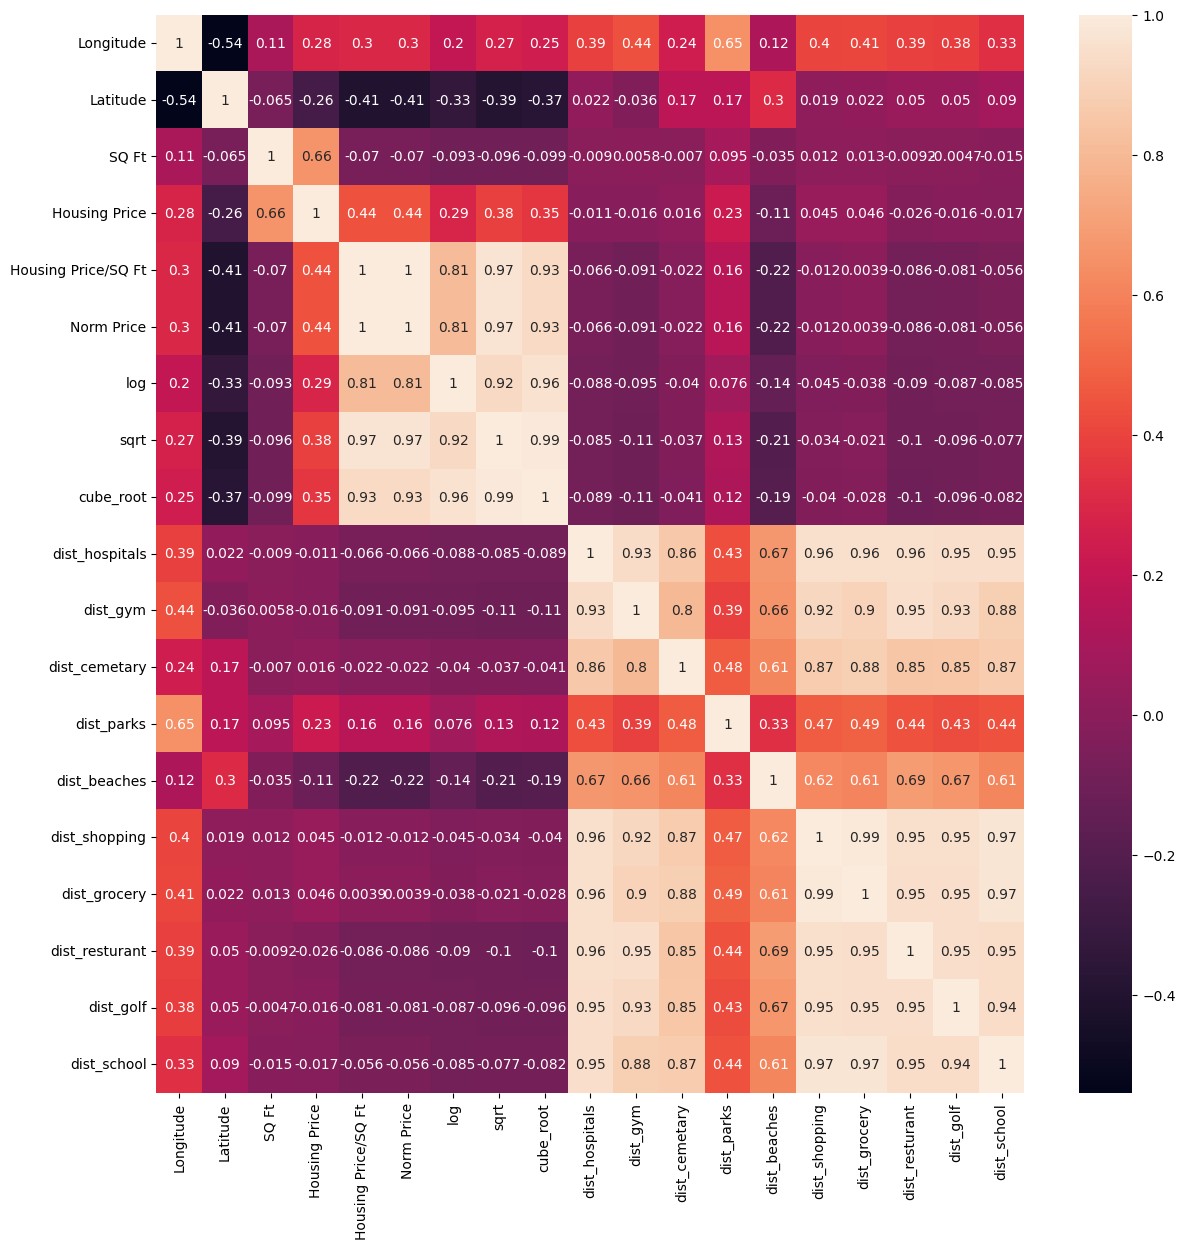

In [78]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(houses_ca.corr(), annot=True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2112\1115043919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houses_il.corr(), annot=True)


<AxesSubplot: >

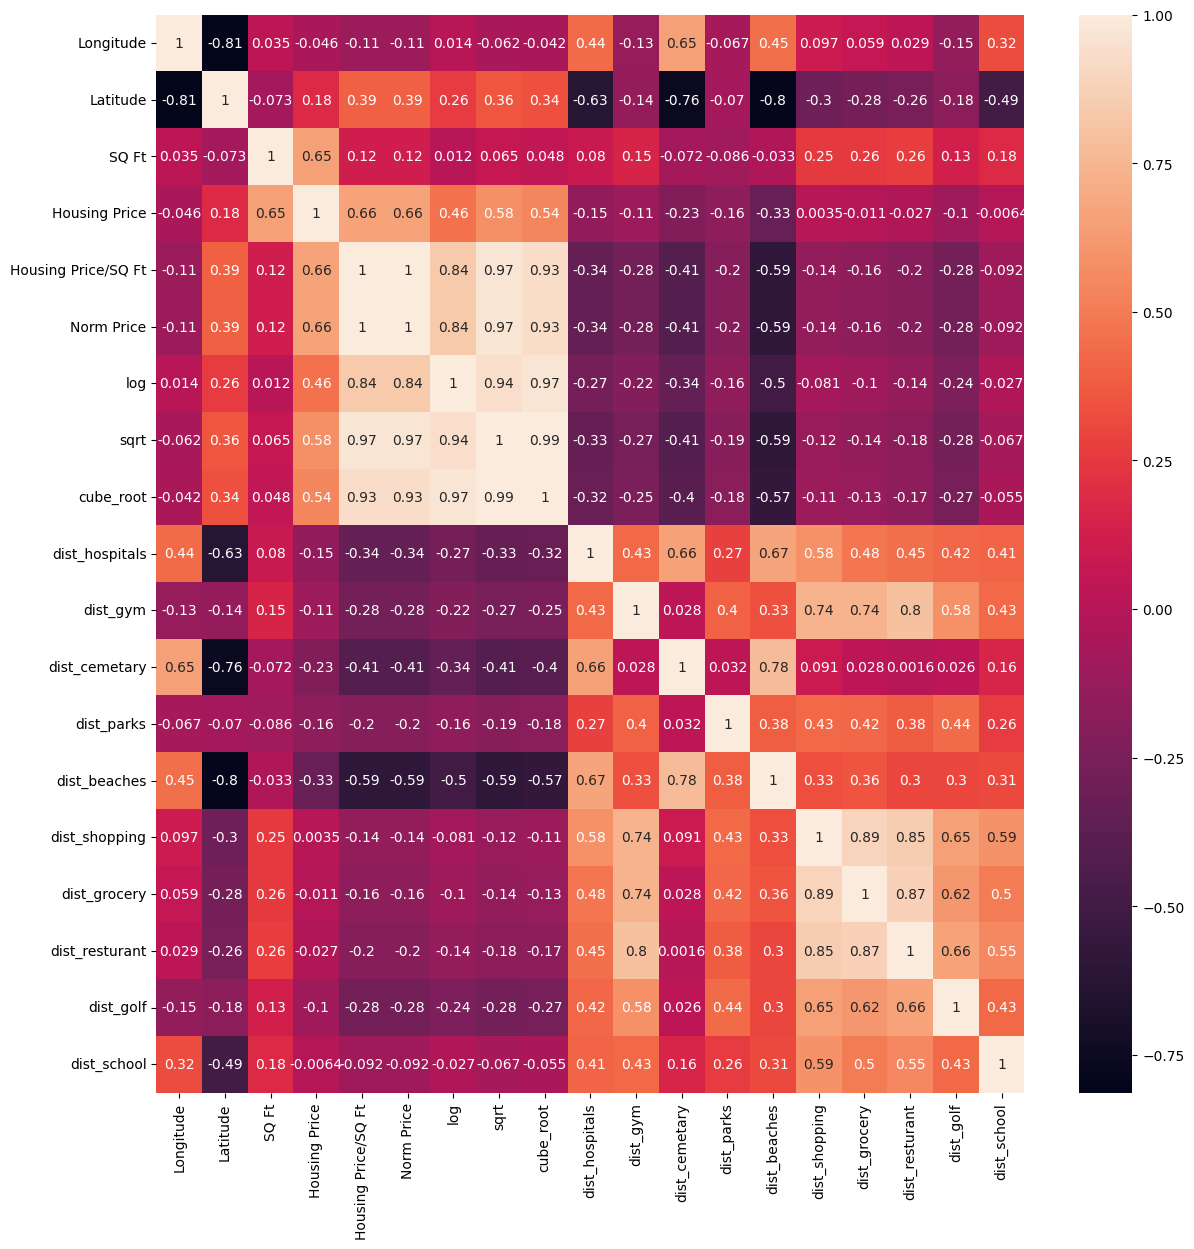

In [80]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(houses_il.corr(), annot=True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2112\1933836110.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houses_tx.corr(), annot=True)


<AxesSubplot: >

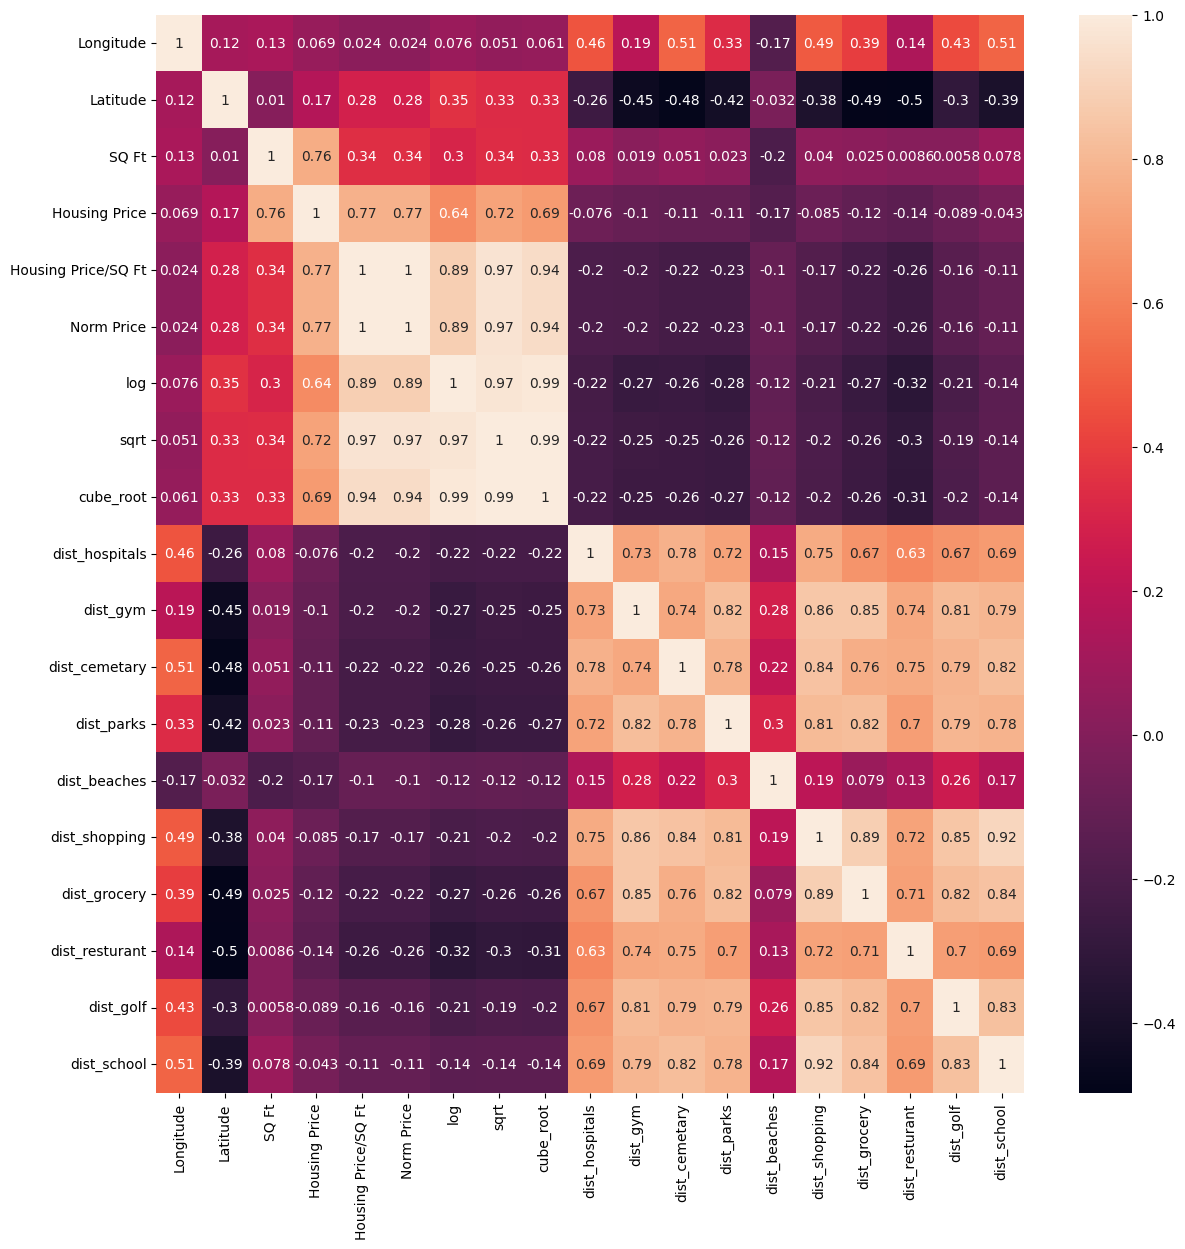

In [81]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(houses_tx.corr(), annot=True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2112\563460868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houses_dc.corr(), annot=True)


<AxesSubplot: >

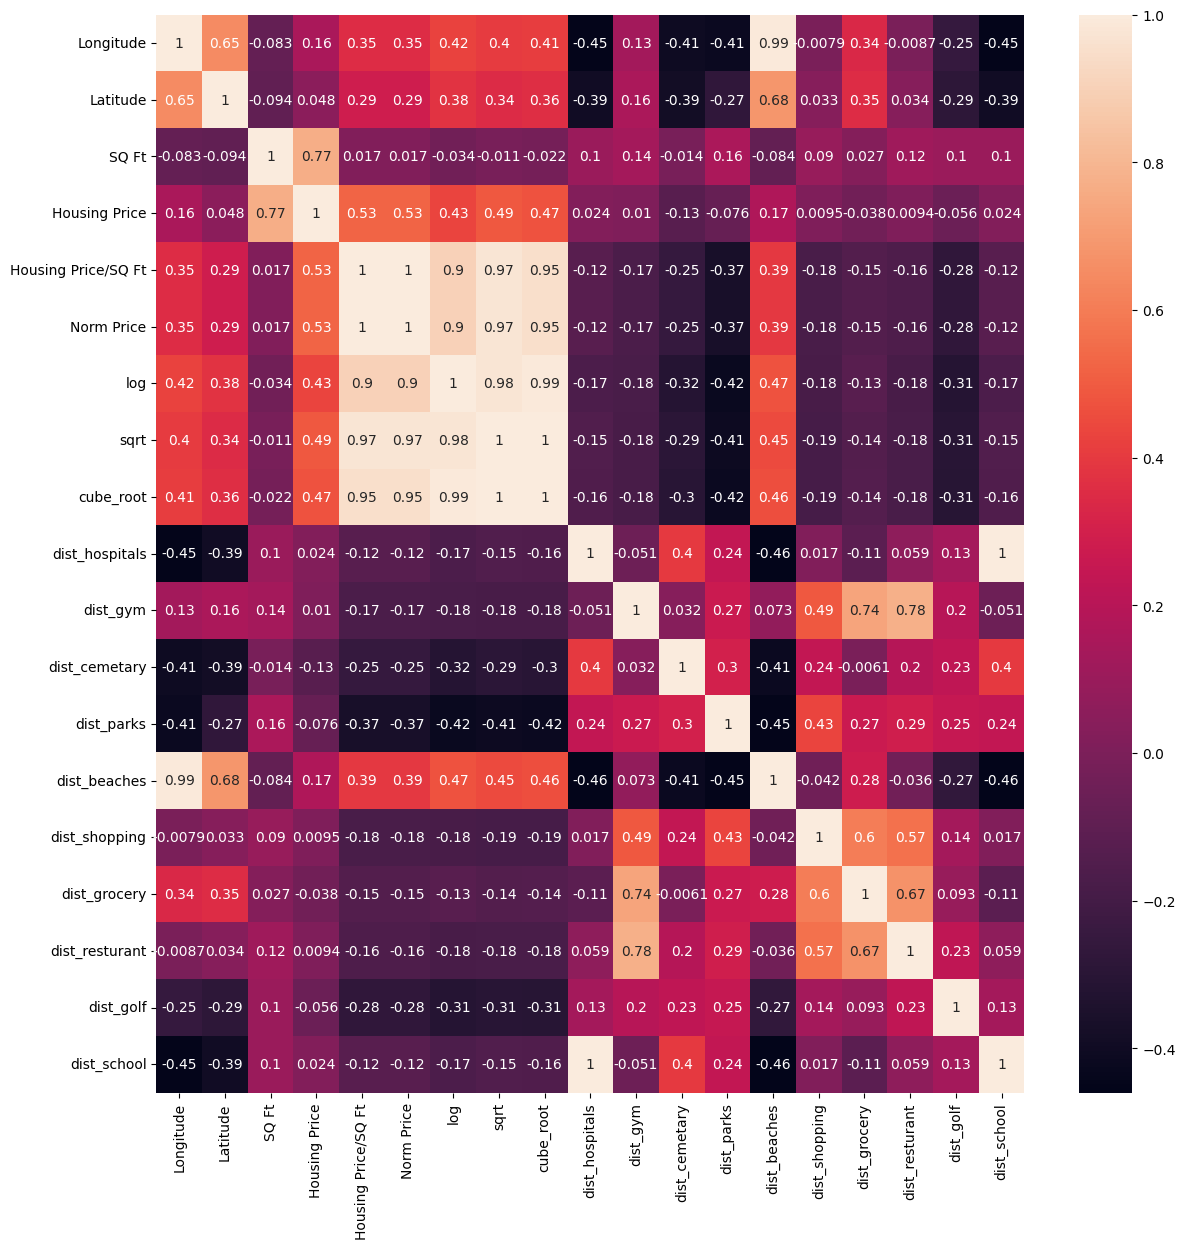

In [82]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(houses_dc.corr(), annot=True)

In [83]:
#separate to explore
houses_ca_eda = houses_ca.iloc[:,19:]
houses_il_eda = houses_il.iloc[:,19:]
houses_tx_eda = houses_tx.iloc[:,19:]
houses_dc_eda = houses_dc.iloc[:,19:]

houses_ca_eda = pd.concat([houses_ca['Norm Price'], houses_ca_eda], axis = 1)
houses_ca_eda = pd.concat([houses_ca['Housing Price'], houses_ca_eda], axis = 1)

houses_il_eda = pd.concat([houses_il['Norm Price'], houses_il_eda], axis = 1)
houses_il_eda = pd.concat([houses_il['Housing Price'], houses_il_eda], axis = 1)

houses_tx_eda = pd.concat([houses_tx['Norm Price'], houses_tx_eda], axis = 1)
houses_tx_eda = pd.concat([houses_tx['Housing Price'], houses_tx_eda], axis = 1)

houses_dc_eda = pd.concat([houses_dc['Norm Price'], houses_dc_eda], axis = 1)
houses_dc_eda = pd.concat([houses_dc['Housing Price'], houses_dc_eda], axis = 1)

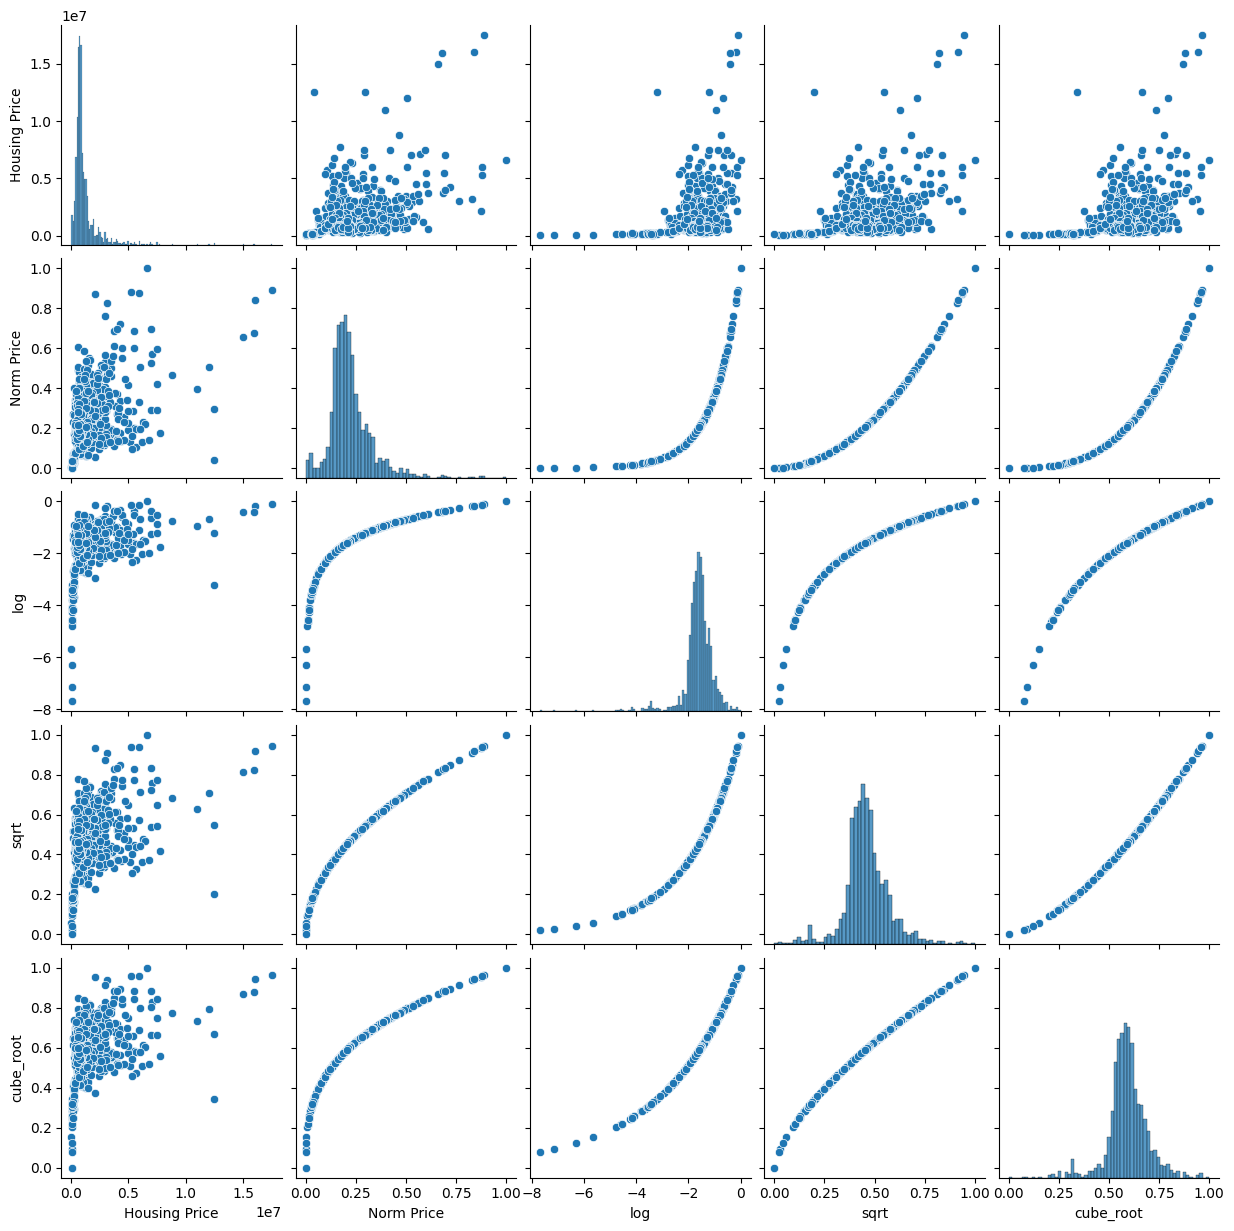

In [63]:
sns.pairplot(houses_ca_eda)

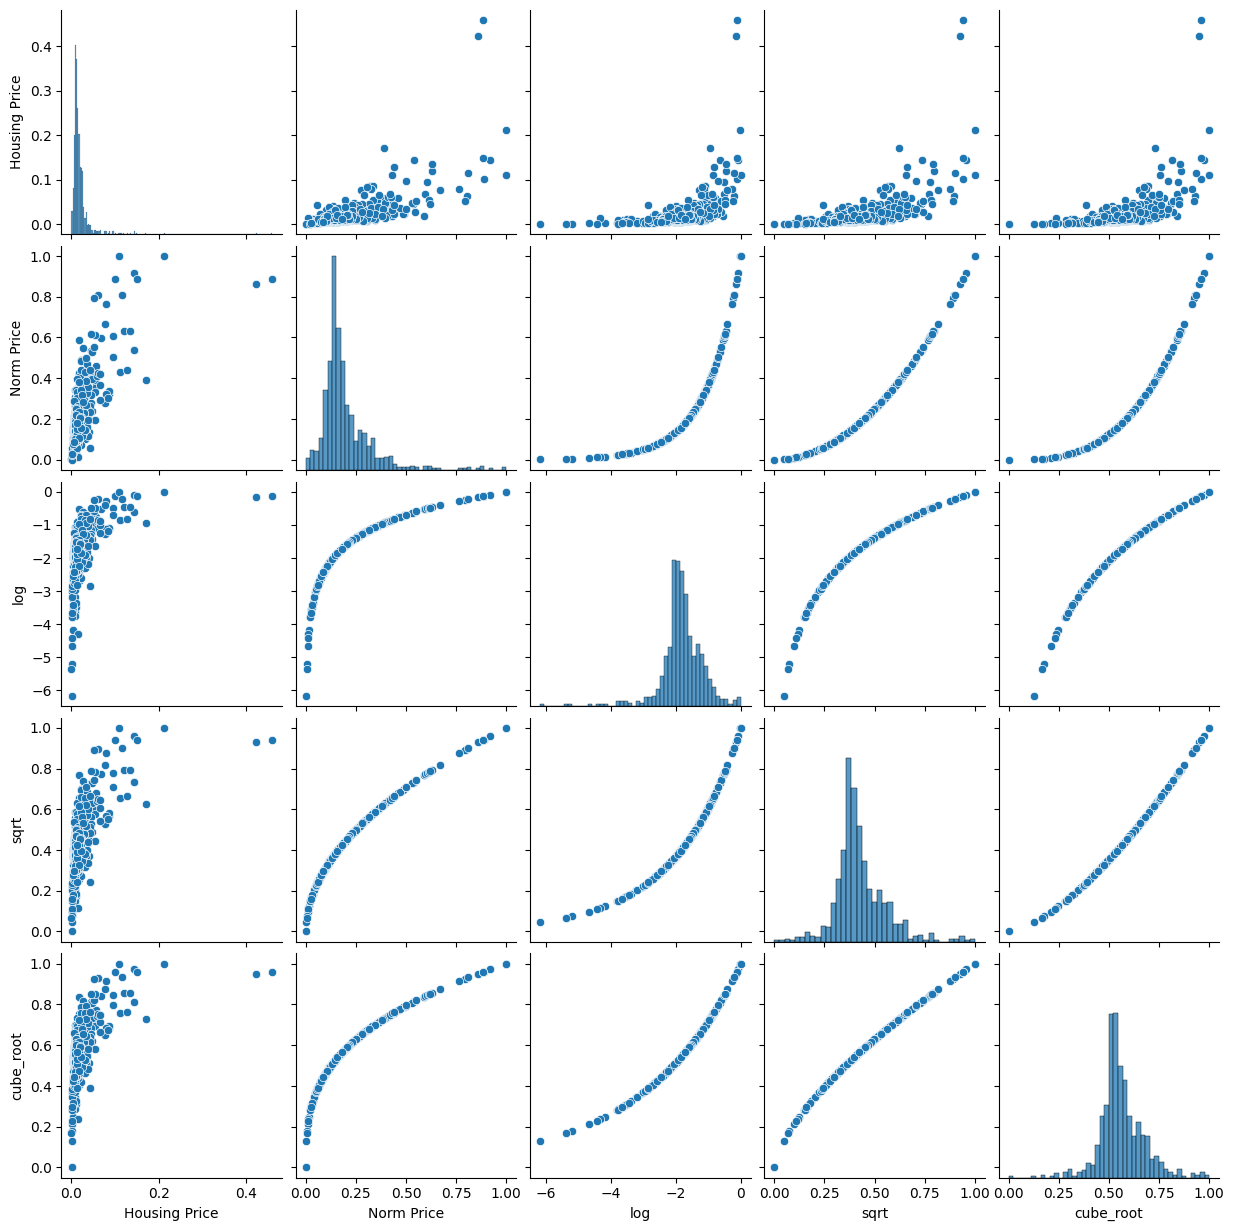

In [66]:
sns.pairplot(houses_il_eda)

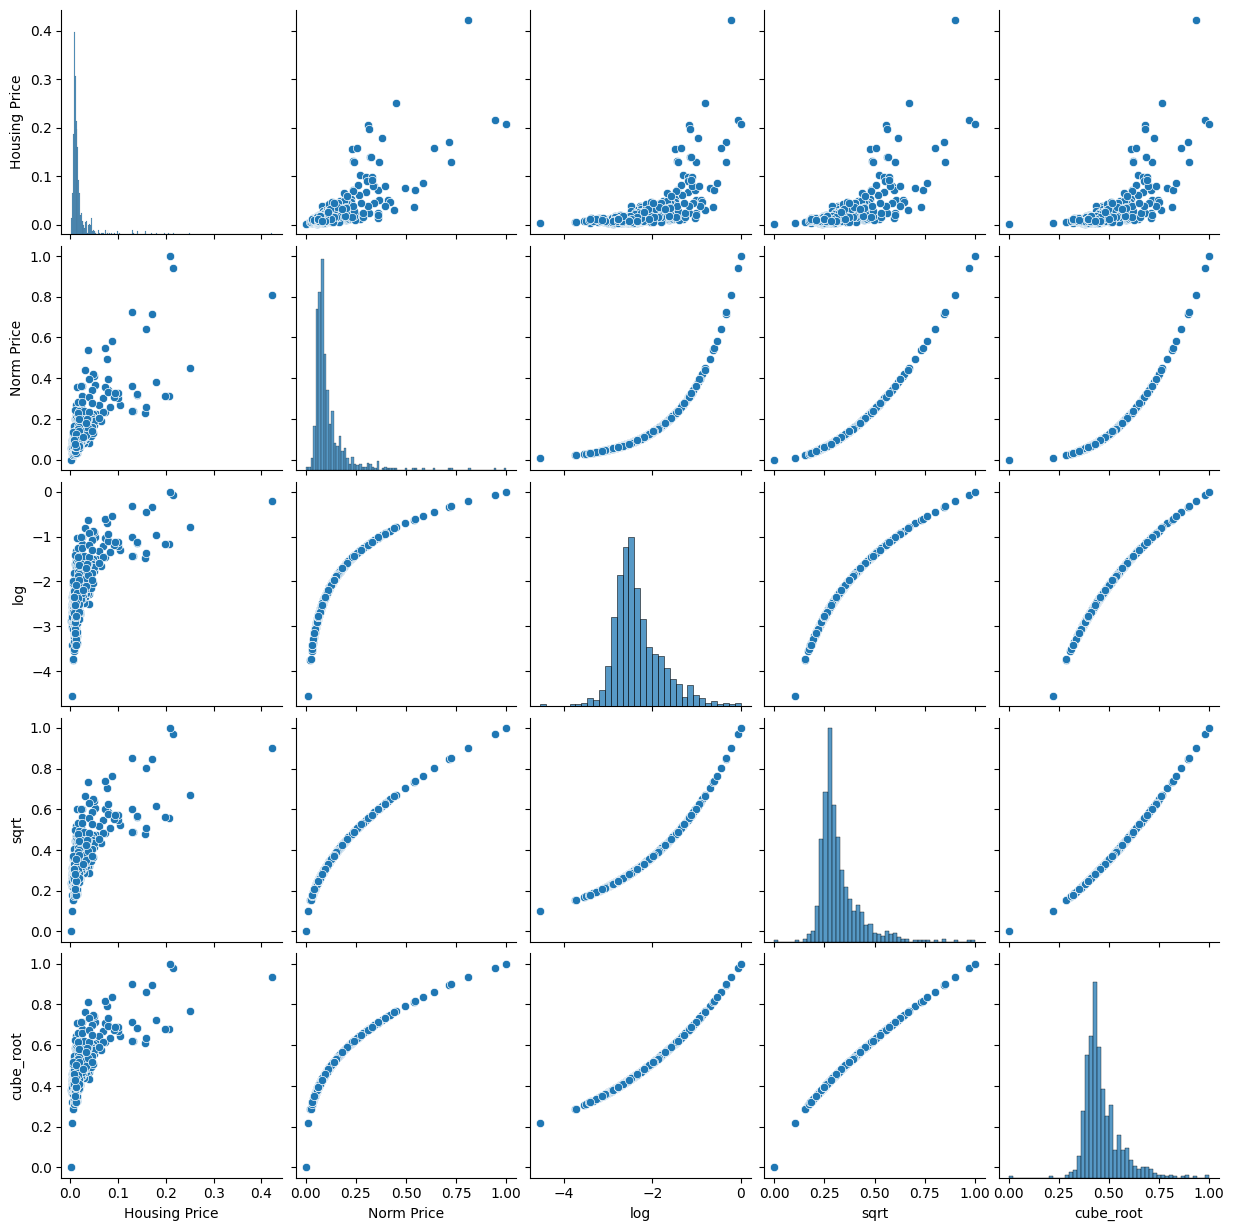

In [67]:
sns.pairplot(houses_tx_eda)

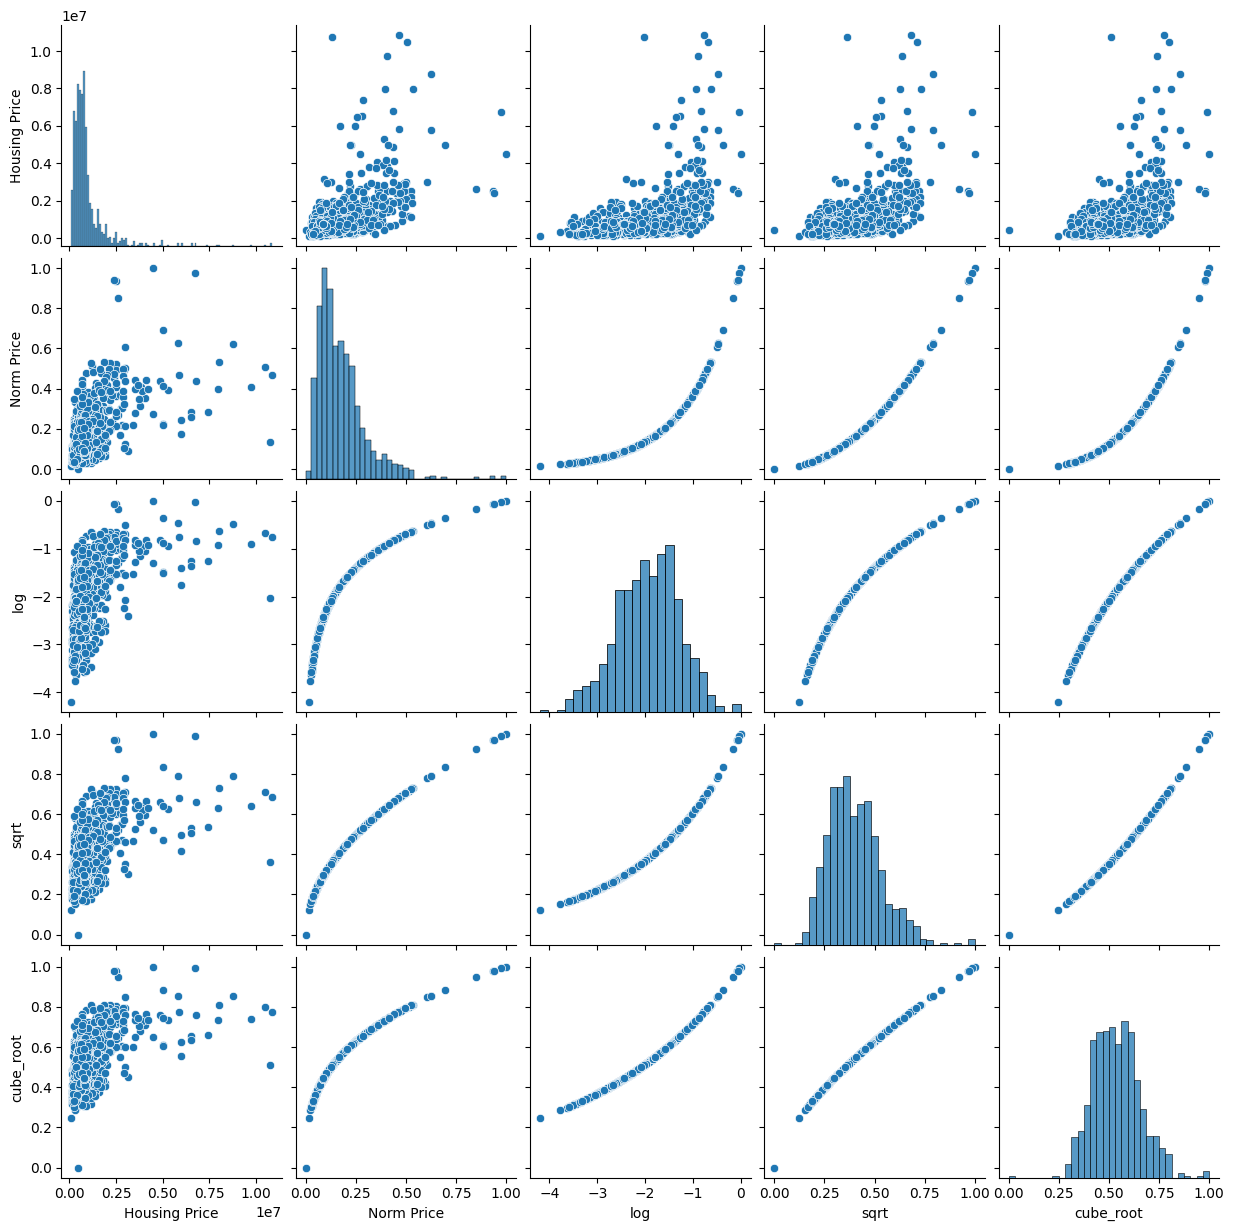

In [68]:
sns.pairplot(houses_dc_eda)

CA: square
IL: cube
TX: log/cube
DC: log/cube